# Student Name - Ms. Shruti Katkade
# Student No. - 22206067
The Web API - Open Movie Database (OMDB)

# Task 2. Data Preparation and Analysis

Importing necessary libraries

In [38]:
import json
from pathlib import Path
from datetime import datetime
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from pandas.plotting import scatter_matrix
import seaborn as sns
%matplotlib inline

Data preprocessing steps include removing duplicates, converting into datetime, filling missing values, renaming columns which will filter, clean and tranform the data

In [8]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('movies.csv')

# Remove duplicates
df.drop_duplicates(inplace=True)


# Convert release_year column to datetime
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Rename columns to be more descriptive
df.rename(columns={'imdb_rating': 'rating', 'imdb_votes': 'num_votes'}, inplace=True)

# Filter the data to include only movies released after 2000
df = df[df['Year'] > '2000-01-01']


# Print the first 5 rows of the cleaned dataset
print(df.head())

                               Title       Year  Rated     Released  Runtime  \
0                    The Dark Knight 2008-01-01  PG-13  18 Jul 2008  152 min   
1                          Inception 2010-01-01  PG-13  16 Jul 2010  148 min   
2                       Interstellar 2014-01-01  PG-13  07 Nov 2014  169 min   
3  Everything Everywhere All at Once 2022-01-01      R  08 Apr 2022  139 min   
4     All Quiet on the Western Front 2022-01-01      R  28 Oct 2022  148 min   

                       Genre                    Director  \
0       Action, Crime, Drama           Christopher Nolan   
1  Action, Adventure, Sci-Fi           Christopher Nolan   
2   Adventure, Drama, Sci-Fi           Christopher Nolan   
3  Action, Adventure, Comedy  Dan Kwan, Daniel Scheinert   
4         Action, Drama, War               Edward Berger   

                                              Writer  \
0  Jonathan Nolan, Christopher Nolan, David S. Goyer   
1                                  Christopher

Here error column seem unnecessary so using drop function we can drop it

In [11]:
# Drop error column
df.drop('Error', axis=1, inplace=True)

In [12]:
# Display dataset after cleaning, filtering and transforming
df

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response
0,The Dark Knight,2008-01-01,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Goyer","Christian Bale, Heath Ledger, Aaron Eckhart",When the menace known as the Joker wreaks havo...,...,84.0,9.0,"2,682,004",tt0468569,movie,09 Dec 2008,"$534,987,076",NaN,NaN,True
1,Inception,2010-01-01,PG-13,16 Jul 2010,148 min,"Action, Adventure, Sci-Fi",Christopher Nolan,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",A thief who steals corporate secrets through t...,...,74.0,8.8,"2,379,638",tt1375666,movie,07 Dec 2010,"$292,587,330",NaN,NaN,True
2,Interstellar,2014-01-01,PG-13,07 Nov 2014,169 min,"Adventure, Drama, Sci-Fi",Christopher Nolan,"Jonathan Nolan, Christopher Nolan","Matthew McConaughey, Anne Hathaway, Jessica Ch...",A team of explorers travel through a wormhole ...,...,74.0,8.6,"1,866,991",tt0816692,movie,31 Mar 2015,"$188,020,017",NaN,NaN,True
3,Everything Everywhere All at Once,2022-01-01,R,08 Apr 2022,139 min,"Action, Adventure, Comedy","Dan Kwan, Daniel Scheinert","Dan Kwan, Daniel Scheinert","Michelle Yeoh, Stephanie Hsu, Jamie Lee Curtis",A middle-aged Chinese immigrant is swept up in...,...,81.0,8.0,"327,605",tt6710474,movie,07 Jun 2022,"$70,008,593",A24,NaN,True
4,All Quiet on the Western Front,2022-01-01,R,28 Oct 2022,148 min,"Action, Drama, War",Edward Berger,"Edward Berger, Lesley Paterson, Ian Stokell","Felix Kammerer, Albrecht Schuch, Aaron Hilmer",A young German soldier's terrifying experience...,...,76.0,7.8,"150,522",tt1016150,movie,28 Oct 2022,NaN,Netflix,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,No Time to Die,2021-01-01,PG-13,08 Oct 2021,163 min,"Action, Adventure, Thriller",Cary Joji Fukunaga,"Neal Purvis, Robert Wade, Cary Joji Fukunaga","Daniel Craig, Ana de Armas, Rami Malek",James Bond has left active service. His peace ...,...,68.0,7.3,"409,879",tt2382320,movie,09 Nov 2021,"$160,891,007",Metro-Goldwyn-Mayer,NaN,True
77,Fifty Shades Freed,2018-01-01,R,09 Feb 2018,105 min,"Drama, Romance, Thriller",James Foley,"Niall Leonard, E.L. James","Dakota Johnson, Jamie Dornan, Eric Johnson","Anastasia and Christian get married, but Jack ...",...,31.0,4.5,"68,000",tt4477536,movie,08 May 2018,"$100,407,760",NaN,NaN,True
78,Fifty Shades Darker,2017-01-01,R,10 Feb 2017,118 min,"Drama, Romance, Thriller",James Foley,"Niall Leonard, E.L. James","Dakota Johnson, Jamie Dornan, Eric Johnson",While Christian wrestles with his inner demons...,...,33.0,4.6,"105,110",tt4465564,movie,09 May 2017,"$114,581,250",NaN,NaN,True
87,The Lord of the Rings: The Fellowship of the Ring,2001-01-01,PG-13,19 Dec 2001,178 min,"Action, Adventure, Drama",Peter Jackson,"J.R.R. Tolkien, Fran Walsh, Philippa Boyens","Elijah Wood, Ian McKellen, Orlando Bloom",A meek Hobbit from the Shire and eight compani...,...,92.0,8.8,"1,893,698",tt0120737,movie,06 Aug 2002,"$316,115,420",NaN,NaN,True


In [13]:
# Replace NaN values in the imdb_rating column with 0
df.fillna(0, inplace=True)

# Data Verification

Check the format of othe newly-created movies Data Frame:

In [14]:
# Display dataset
df

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response
0,The Dark Knight,2008-01-01,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Goyer","Christian Bale, Heath Ledger, Aaron Eckhart",When the menace known as the Joker wreaks havo...,...,84.0,9.0,"2,682,004",tt0468569,movie,09 Dec 2008,"$534,987,076",0,0.0,True
1,Inception,2010-01-01,PG-13,16 Jul 2010,148 min,"Action, Adventure, Sci-Fi",Christopher Nolan,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",A thief who steals corporate secrets through t...,...,74.0,8.8,"2,379,638",tt1375666,movie,07 Dec 2010,"$292,587,330",0,0.0,True
2,Interstellar,2014-01-01,PG-13,07 Nov 2014,169 min,"Adventure, Drama, Sci-Fi",Christopher Nolan,"Jonathan Nolan, Christopher Nolan","Matthew McConaughey, Anne Hathaway, Jessica Ch...",A team of explorers travel through a wormhole ...,...,74.0,8.6,"1,866,991",tt0816692,movie,31 Mar 2015,"$188,020,017",0,0.0,True
3,Everything Everywhere All at Once,2022-01-01,R,08 Apr 2022,139 min,"Action, Adventure, Comedy","Dan Kwan, Daniel Scheinert","Dan Kwan, Daniel Scheinert","Michelle Yeoh, Stephanie Hsu, Jamie Lee Curtis",A middle-aged Chinese immigrant is swept up in...,...,81.0,8.0,"327,605",tt6710474,movie,07 Jun 2022,"$70,008,593",A24,0.0,True
4,All Quiet on the Western Front,2022-01-01,R,28 Oct 2022,148 min,"Action, Drama, War",Edward Berger,"Edward Berger, Lesley Paterson, Ian Stokell","Felix Kammerer, Albrecht Schuch, Aaron Hilmer",A young German soldier's terrifying experience...,...,76.0,7.8,"150,522",tt1016150,movie,28 Oct 2022,0,Netflix,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,No Time to Die,2021-01-01,PG-13,08 Oct 2021,163 min,"Action, Adventure, Thriller",Cary Joji Fukunaga,"Neal Purvis, Robert Wade, Cary Joji Fukunaga","Daniel Craig, Ana de Armas, Rami Malek",James Bond has left active service. His peace ...,...,68.0,7.3,"409,879",tt2382320,movie,09 Nov 2021,"$160,891,007",Metro-Goldwyn-Mayer,0.0,True
77,Fifty Shades Freed,2018-01-01,R,09 Feb 2018,105 min,"Drama, Romance, Thriller",James Foley,"Niall Leonard, E.L. James","Dakota Johnson, Jamie Dornan, Eric Johnson","Anastasia and Christian get married, but Jack ...",...,31.0,4.5,"68,000",tt4477536,movie,08 May 2018,"$100,407,760",0,0.0,True
78,Fifty Shades Darker,2017-01-01,R,10 Feb 2017,118 min,"Drama, Romance, Thriller",James Foley,"Niall Leonard, E.L. James","Dakota Johnson, Jamie Dornan, Eric Johnson",While Christian wrestles with his inner demons...,...,33.0,4.6,"105,110",tt4465564,movie,09 May 2017,"$114,581,250",0,0.0,True
87,The Lord of the Rings: The Fellowship of the Ring,2001-01-01,PG-13,19 Dec 2001,178 min,"Action, Adventure, Drama",Peter Jackson,"J.R.R. Tolkien, Fran Walsh, Philippa Boyens","Elijah Wood, Ian McKellen, Orlando Bloom",A meek Hobbit from the Shire and eight compani...,...,92.0,8.8,"1,893,698",tt0120737,movie,06 Aug 2002,"$316,115,420",0,0.0,True


In [15]:
# Summarize the dataset using the describe() method
print(df.describe())

       Metascore  imdbRating  Website
count  73.000000   73.000000     73.0
mean   57.164384    6.686301      0.0
std    20.459997    1.603236      0.0
min     0.000000    0.000000      0.0
25%    49.000000    6.300000      0.0
50%    62.000000    7.000000      0.0
75%    70.000000    7.600000      0.0
max    92.000000    9.000000      0.0


# Data Analysis

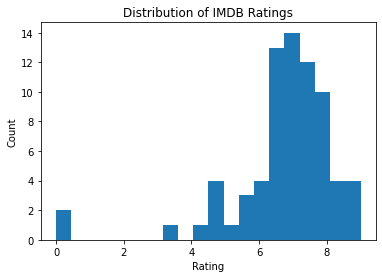

In [17]:
# Create a histogram of the imdbRating column
plt.hist(df['imdbRating'], bins=20)
plt.title('Distribution of IMDB Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

For above figure, the distribution lies highly between 6 to 9. This means that there are more movies with hiher IMDB rating which projects that movie has good review.

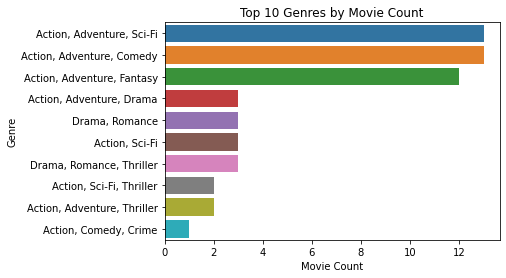

In [19]:
# Create a bar plot of the top 10 genres by movie count
genre_counts = df['Genre'].value_counts().head(10)
sns.barplot(x=genre_counts, y=genre_counts.index)
plt.title('Top 10 Genres by Movie Count')
plt.xlabel('Movie Count')
plt.ylabel('Genre')
plt.show()

Action and Adventure are the genres which seems to be the most popular and widely produced and directed.

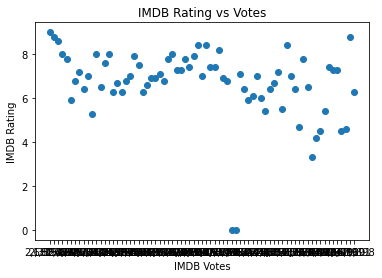

In [31]:
# Convert imdb_votes to string
df['imdbVotes'] = df['imdbVotes'].astype(str)

# Create a scatter plot of imdbRating vs imdbVotes
plt.scatter(df['imdbVotes'], df['imdbRating'])
plt.title('IMDB Rating vs Votes')
plt.xlabel('IMDB Votes')
plt.ylabel('IMDB Rating')
plt.show()

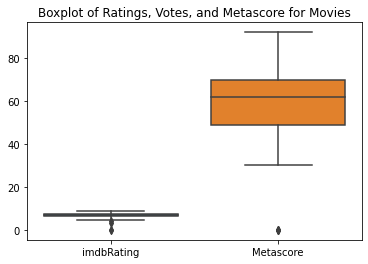

In [29]:
# Create a boxplot for ratings, votes, and metascore
sns.boxplot(data=df[['imdbRating', 'imdbVotes', 'Metascore']])
plt.title('Boxplot of Ratings, Votes, and Metascore for Movies')
plt.show()

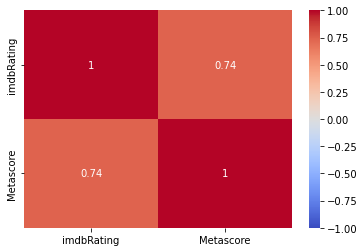

In [26]:
# Create a correlation matrix
corr_matrix = df[['imdbRating', 'imdbVotes', 'Metascore']].corr()

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Show the plot
plt.show()

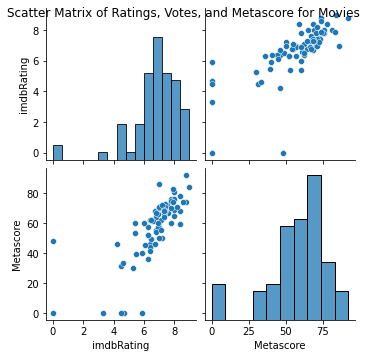

In [35]:
# Create a scatter matrix for ratings, votes, and metascore
sns.pairplot(data=df[['imdbRating', 'imdbVotes', 'Metascore']])
plt.suptitle('Scatter Matrix of Ratings, Votes, and Metascore for Movies', fontsize=12)
plt.show()

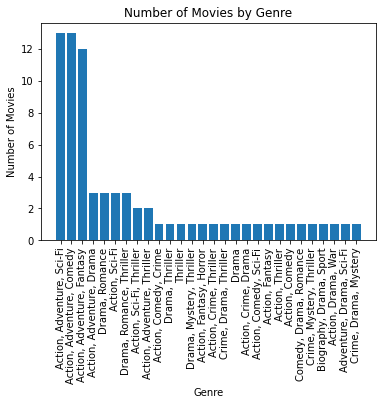

In [36]:
# Create a bar chart of the number of movies in each genre
genre_counts = df['Genre'].value_counts()
plt.bar(genre_counts.index, genre_counts.values)
plt.xticks(rotation=90)
plt.title('Number of Movies by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

Measuring the similarity or distance between these profiles, using a standard measure such as Euclidean distance:

In [41]:
X = np.array(genre_counts.transpose()).reshape(-1,1)
D = euclidean_distances(X)
D

array([[ 0.,  0.,  1., 10., 10., 10., 10., 11., 11., 12., 12., 12., 12.,
        12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12.,
        12., 12.],
       [ 0.,  0.,  1., 10., 10., 10., 10., 11., 11., 12., 12., 12., 12.,
        12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12.,
        12., 12.],
       [ 1.,  1.,  0.,  9.,  9.,  9.,  9., 10., 10., 11., 11., 11., 11.,
        11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11.,
        11., 11.],
       [10., 10.,  9.,  0.,  0.,  0.,  0.,  1.,  1.,  2.,  2.,  2.,  2.,
         2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
         2.,  2.],
       [10., 10.,  9.,  0.,  0.,  0.,  0.,  1.,  1.,  2.,  2.,  2.,  2.,
         2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
         2.,  2.],
       [10., 10.,  9.,  0.,  0.,  0.,  0.,  1.,  1.,  2.,  2.,  2.,  2.,
         2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
         2.,  2.],
       [10

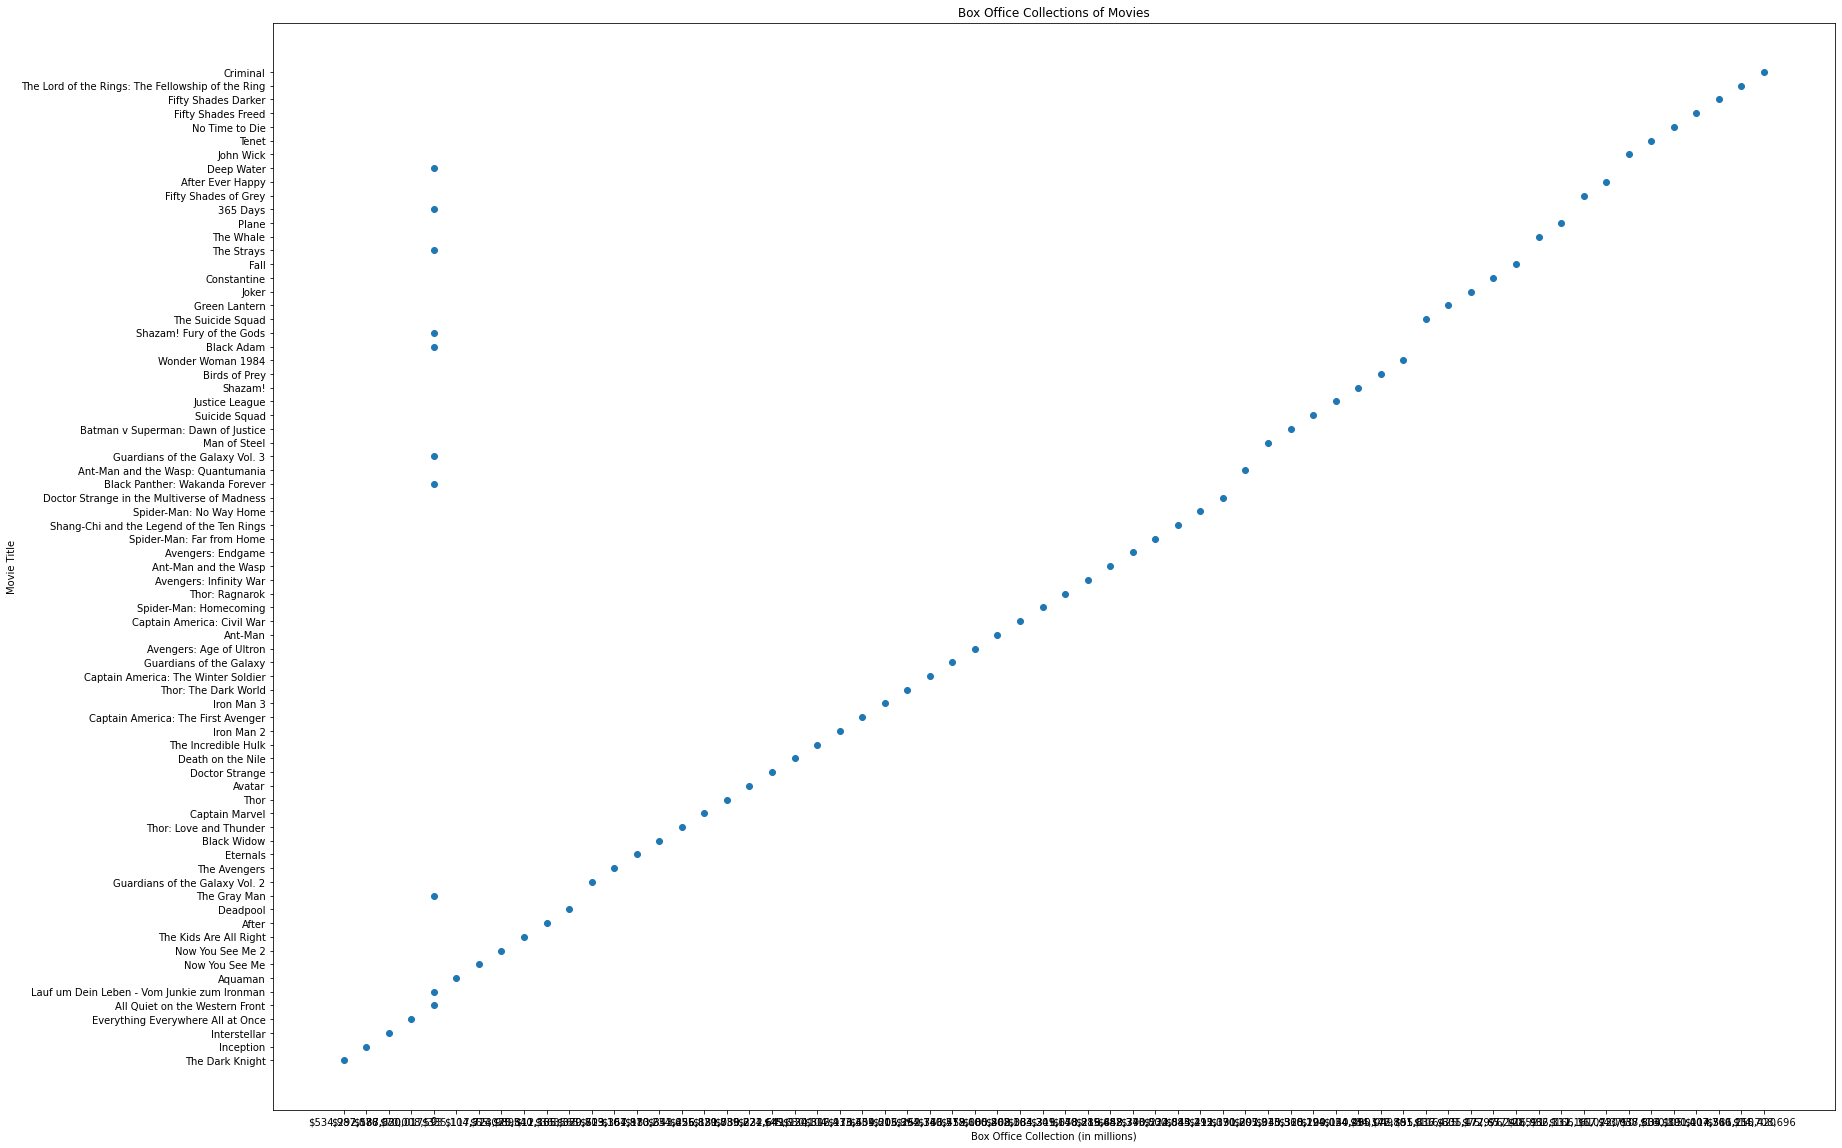

In [55]:
# A scatter plot of box office collections of movies
df['BoxOffice'] = df['BoxOffice'].astype(str)

plt.figure(figsize=(28, 20))
plt.scatter(df['BoxOffice'], df['Title'])
plt.title('Box Office Collections of Movies')
plt.xlabel('Box Office Collection (in millions)')
plt.ylabel('Movie Title')
plt.show()

In [46]:
# The movie with the highest box office collection
max_box_office = df['BoxOffice'].max()
highest_grossing_movie = df.loc[df['BoxOffice'] == max_box_office, 'Title'].iloc[0]
print('The highest grossing movie is:', highest_grossing_movie)

The highest grossing movie is: All Quiet on the Western Front


# Task 3 - Discussion and Conclusions

In this assignment, I have used OMDB(Open Movie Database) API to work on.



Issues-

a) While fetching data from APIs the main issue that I faced was getting a null value while dumping into jason file while tring to fetch data from Eventbright API and CDC Open Data API.

b) With OMDB(Open Movie Database) API, the downloaded data was too big to store for my processor and was unable to convert to csv file so at the end to move to task 2 I had to feed movie names so that I can get enough data for processing.



Insights-

a) Here OMDB has movies stored with wide distributions of columns which help in analyzing the movies based on various factors like IMDB rating, IMDB Movies, BoxOffice Collection of the movie, Role played, Release Date, Genres, Awards, City etc.

b) Considering factors like IMDB rating, IMDB Votes, Metascore we can easily search for most liked movie and most disliked movies and also with BoxOffice collection value we can tell about the highest and lowest grossing of any movie.




~The analysis could be extended by integrating TV Series/Web Series too with same features.

~The analysis could have been extended to complex dataset by including poster of movie and small teaser of movie.